## Download data  

In [ ]:
!gdown --id 1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 7.34MB/s]


In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 10.1 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

## Load Data

In [ ]:
dataset = pd.read_csv("/content/Auto_MPG_data.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## Tiền xử lý dữ liệu dạng table

### Lấy label và chia bộ dữ liệu train/val

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

In [ ]:
X_train = train_dataset.copy()
X_val = val_dataset.copy()

y_train = X_train.pop('MPG')
y_val = X_val.pop('MPG')

X_train, y_train = X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32)
X_val, y_val = X_val.to_numpy().astype(np.float32), y_val.to_numpy().astype(np.float32) 

### Chuẩn hóa dữ liệu (Data Standardisation)

In [ ]:
_MEAN = X_train.mean(axis=0)
_STD = X_train.std(axis=0)

X_train = ( X_train-_MEAN)/_STD
X_val = ( X_val-_MEAN)/_STD

## Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib 

### MLP for Regressuion - MSE

In [ ]:
MLP_Regression_model = keras.Sequential([
    keras.layers.Dense(units=64, input_shape=[9], activation="relu"),
    keras.layers.Dense(units=64,  activation="relu"),
    keras.layers.Dense(units=1)
])

In [ ]:
######################### YOUR CODE HERE #########################
# Sử dụng tf.keras.Sequential để thiết kế model theo yêu cầu đề  bài 
MLP_Regression_model = tf.keras.Sequential([
    # Hidden layer 1: 64 nodes, input shape = 9, activation = relu

    # Hidden layer 2: 64 nodes, activation = relu

    # Output layer: 1 node
])
##################################################################
MLP_Regression_model.summary()
#
opt = tf.keras.optimizers.SGD(learning_rate=0.003)
MLP_Regression_model.compile(optimizer=opt,loss="mse",
                             metrics=[tfa.metrics.RSquare(), tf.keras.metrics.MeanAbsoluteError()])

MLP_Regression_history = MLP_Regression_model.fit( X_train, y_train, validation_data=(X_val, y_val) ,epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                640       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 2s 81ms/step - loss: 373.4254 - r_square: -5.2716 - mean_absolute_error: 16.9744 - val_loss: 27.0229 - val_r_square: 0.5862 - val_mean_absolute_error: 4.1620
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 21.7902 - r_square: 0.6340 - me

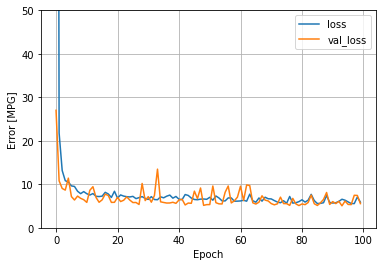

In [ ]:
plt.plot(MLP_Regression_history.history['loss'], label='loss')
plt.plot(MLP_Regression_history.history['val_loss'], label='val_loss')
plt.ylim([0, 50])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(MLP_Regression_history.history)
hist['epoch'] = MLP_Regression_history.epoch
hist.tail()

,loss,r_square,mean_absolute_error,val_loss,val_r_square,val_mean_absolute_error,epoch
95,5.958001,0.899936,1.685979,5.375620,0.917687,1.819678,95
96,5.584051,0.906216,1.692994,5.333983,0.918324,1.771464,96
97,5.564871,0.906539,1.627429,7.479483,0.885472,2.137654,97
98,7.072178,0.881223,1.876402,7.441677,0.886050,1.989771,98
99,5.900989,0.900894,1.683031,5.559521,0.914871,1.848970,99


In [ ]:
print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))
print("Min MAE: ", min(hist['mean_absolute_error']))
print("Min val MAE: ", min(hist['val_mean_absolute_error']))
print("Max r-squared loss: ", max(hist['r_square']))
print("Max val r-squared loss: ", max(hist['val_r_square']))

Min train loss:  5.564871311187744
Min val loss:  5.057913780212402
Min MAE:  1.6274293661117554
Min val MAE:  1.7310982942581177
Max r-squared loss:  0.9065385460853577
Max val r-squared loss:  0.9225514531135559
